# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing = housing.drop('No', axis=1)

In [4]:
housing.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
housing.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

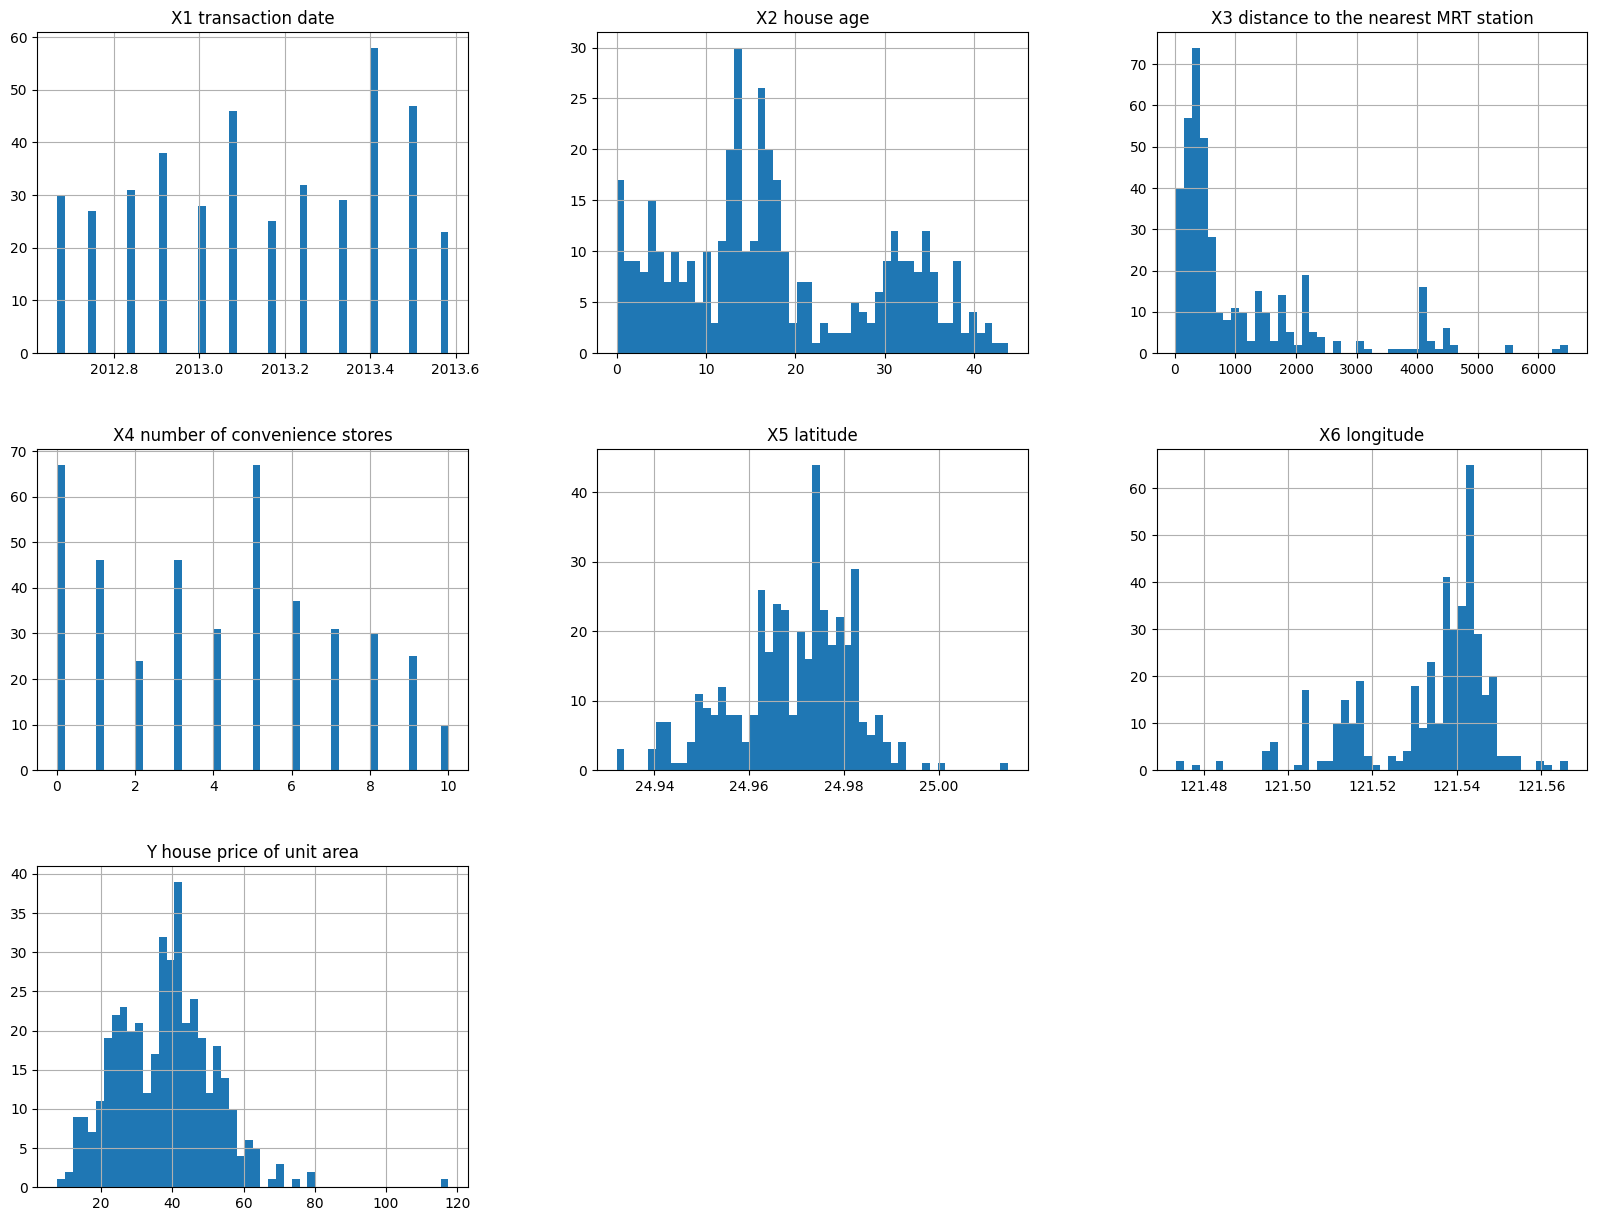

In [9]:
housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

In [10]:
import numpy as np

In [11]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(housing,0.2)

In [13]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 331
Rows in test set: 83



In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Create bins for the 'X3 distance to the nearest MRT station'
housing['distance_bin'] = pd.cut(housing['X3 distance to the nearest MRT station'],
                                 bins=np.linspace(housing['X3 distance to the nearest MRT station'].min(),
                                                  housing['X3 distance to the nearest MRT station'].max(),
                                                  num=10))  # Adjust the number of bins as necessary

# Remove rows with NaN values in the 'distance_bin' column
housing_cleaned = housing.dropna(subset=['distance_bin'])

# Reset index to ensure the DataFrame has a default integer index
housing_cleaned = housing_cleaned.reset_index(drop=True)

# Apply StratifiedShuffleSplit on the cleaned dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_cleaned, housing_cleaned['distance_bin']):
    strat_train_set = housing_cleaned.loc[train_index]
    strat_test_set = housing_cleaned.loc[test_index]

# Drop the bin column if it's not needed
strat_train_set = strat_train_set.drop('distance_bin', axis=1)
strat_test_set = strat_test_set.drop('distance_bin', axis=1)

# Verify the resulting stratified splits
print(f"Training set size: {len(strat_train_set)}")
print(f"Test set size: {len(strat_test_set)}")


Training set size: 329
Test set size: 83


In [16]:
strat_test_set['X3 distance to the nearest MRT station'].value_counts()

X3 distance to the nearest MRT station
289.32480     4
90.45606      3
837.72330     2
383.28050     2
815.93140     2
             ..
185.42960     1
600.86040     1
451.24380     1
3771.89500    1
250.63100     1
Name: count, Length: 72, dtype: int64

In [17]:
strat_train_set['X3 distance to the nearest MRT station'].value_counts()

X3 distance to the nearest MRT station
289.32480     9
492.23130     9
90.45606      8
1360.13900    8
104.81010     7
             ..
312.89630     1
276.44900     1
424.54420     1
390.96960     1
718.29370     1
Name: count, Length: 221, dtype: int64

# looking for correlation

In [18]:
import pandas as pd

# Step 1: Identify non-numeric columns
non_numeric_cols = housing.select_dtypes(exclude=[np.number]).columns

# Step 2: Drop non-numeric columns (you can also convert them if applicable)
housing_numeric = housing.drop(columns=non_numeric_cols)

# Step 3: Compute the correlation matrix
corr_matrix = housing_numeric.corr()

In [19]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X3 distance to the nearest MRT station'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>]],
      dtype=object)

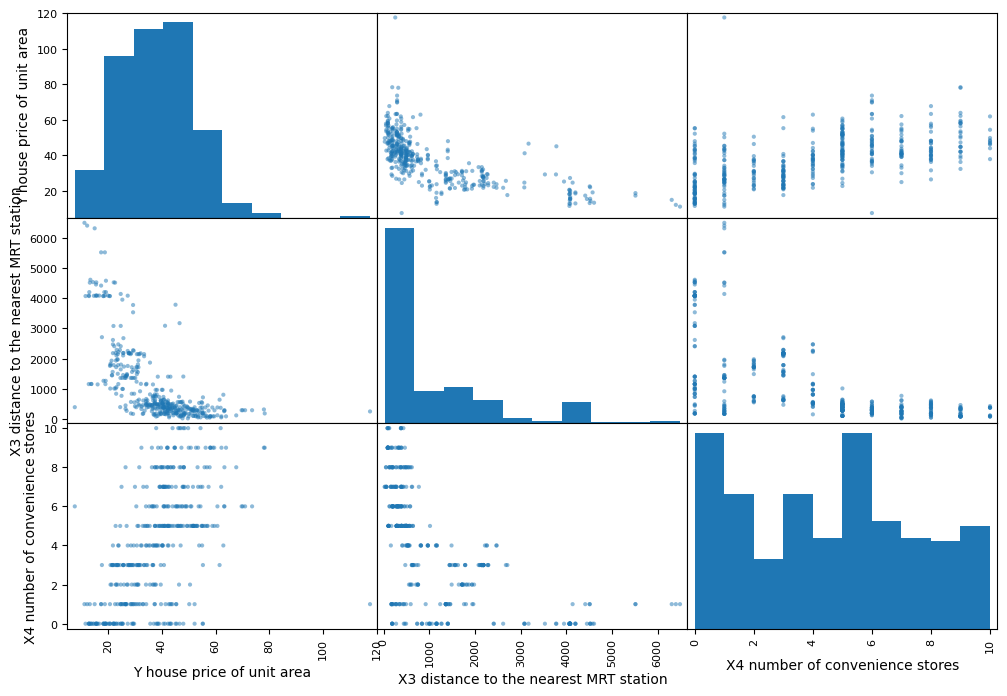

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area","X3 distance to the nearest MRT station","X4 number of convenience stores"]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

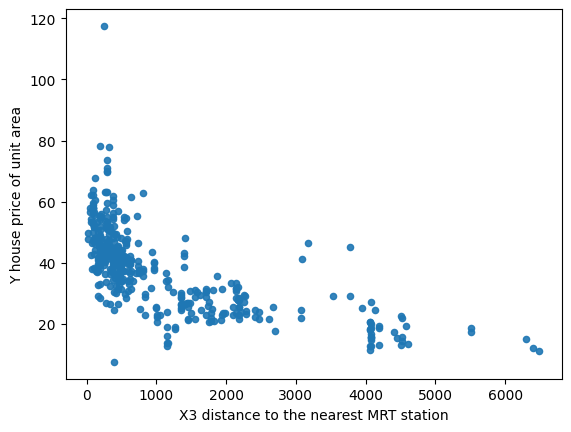

In [22]:
housing.plot(kind="scatter",x="X3 distance to the nearest MRT station",y="Y house price of unit area",alpha=0.9)

# Scikit-learn Design

Estimators - it estimates some parameters based on a dataset. Eg imputer. It has a fit method and transform method. Fit method- fits the dataset and calculates internal parameters.

Transformers- transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

# Creating a Pipeline

In [23]:
housing = strat_train_set.drop("Y house price of unit area",axis=1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

In [24]:
for col in housing.columns:
    if isinstance(housing[col].iloc[0], pd._libs.interval.Interval):
        print(col)


In [25]:
print(housing.dtypes)

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
dtype: object


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Define the pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [27]:
housing_num = my_pipeline.fit_transform(housing)

In [28]:
housing_num

array([[ 1.22057579, -1.21004997,  0.83655792, -0.3868745 , -0.46160858,
        -1.34643309],
       [-0.88549446,  1.46641268, -0.71962332,  1.33780993,  0.66167622,
         0.6299371 ],
       [-0.88549446, -1.37515643, -0.51195252,  0.30299927,  0.54679482,
         0.87926782],
       ...,
       [-1.78861206, -1.28825829, -0.41120557,  0.64793616,  0.25799575,
         0.89754337],
       [ 0.01762315,  1.05799143, -0.29963441, -0.3868745 ,  0.5037143 ,
         0.19393469],
       [ 0.01762315, -0.14989268, -0.64068627,  0.30299927,  1.05737882,
         0.65343423]])

# Selecting a Desired Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num,housing_labels)

RandomForestRegressor()

In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)

array([31.74515   , 44.464     , 47.221     , 34.971     , 51.73066667])

In [34]:
list(some_labels)

[30.7, 44.3, 45.5, 33.1, 51.7]

# Evaluating the model

In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [36]:
mse

9.21424707345919

In [37]:
rmse

3.0354978295922384

# Using better evaluation technique - Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [39]:
rmse_scores

array([ 7.1497839 , 13.90339179,  9.78337626,  6.58847648,  5.27623866,
        5.31167207,  7.00832587,  6.78025304,  6.65934089,  7.80913731])

In [40]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [41]:
print_scores(rmse_scores)

Scores:  [ 7.1497839  13.90339179  9.78337626  6.58847648  5.27623866  5.31167207
  7.00832587  6.78025304  6.65934089  7.80913731]
Mean:  7.626999625989268
Standard deviation:  2.4146514714590483


# Saving the Model

In [42]:
from joblib import dump,load
dump(model, 'SD_Estates.joblib')

['SD_Estates.joblib']

# Testing the Model on Test Data

In [43]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [44]:
final_rmse

6.02127855452061

In [45]:
print(final_predictions)

[26.834      23.501      35.484      39.469      48.614      51.2355
 20.086      18.633      40.707      53.95858333 47.50733333 45.221
 44.737      31.00656667 40.494      60.47097143 25.519      54.13364286
 47.7645     24.689      47.50733333 29.554      33.188      37.983
 48.957      29.555      50.91891667 52.4325     37.577      47.473
 23.465      25.571      37.487      29.347      53.069      34.062
 27.5065     47.70145    24.701      38.375      41.095      40.446
 53.28       54.0455     41.208      57.902      37.722      42.477
 38.325      37.317      47.328      28.373      50.06125    38.397
 37.198      25.963      42.1725     52.623      37.933      42.63116667
 22.992      17.966      44.3268     50.02508333 33.431      34.01
 21.794      37.538      38.336      67.72816667 44.504      13.9712
 20.102      53.256      31.1149     31.73765    25.895      54.20264286
 48.09266667 37.885      25.47466667 45.33406667 67.72816667]


In [46]:
print(list(Y_test))

[25.5, 25.6, 50.2, 42.9, 48.5, 51.6, 25.7, 15.6, 42.3, 62.1, 44.5, 39.7, 42.2, 23.0, 42.6, 63.9, 22.9, 53.5, 43.5, 45.1, 53.3, 30.8, 34.3, 38.1, 49.3, 21.7, 51.8, 54.4, 40.3, 46.1, 21.8, 23.2, 36.8, 23.0, 55.2, 30.9, 23.6, 57.1, 29.3, 46.4, 34.4, 39.0, 67.7, 57.8, 44.0, 53.7, 37.4, 43.7, 43.1, 35.7, 39.4, 27.7, 39.4, 46.6, 41.0, 20.9, 42.2, 41.0, 38.1, 38.4, 24.7, 13.4, 39.5, 36.9, 36.7, 32.9, 11.2, 29.8, 48.0, 63.3, 36.3, 15.5, 18.2, 51.8, 28.8, 28.4, 42.4, 50.0, 51.4, 34.2, 25.9, 41.4, 73.6]


In [47]:
from sklearn.metrics import r2_score

In [48]:
housing_predictions = model.predict(housing_num)

In [49]:
r2 = r2_score(housing_labels,housing_predictions)

In [50]:
r2

0.9511801850088648

In [52]:
r2*100

95.11801850088648